In [386]:
#import cirq
#import cirq_google as cg
#import numpy as np

import LQG.experiments as ex
import LQG.utils as utils
qubit = utils.qubit
#from LQG.classical_experiments import *

# Tutorial 
The circuits used for loop quantum gravity simulations are generated by the `Experiment` object. 
This object takes parameters to define the starting state of each tetrahedra, the qubits used, the face indicies that get entangled, etc. 

## Hardware-ready circuit on a Monopole Spin Network
The below circuit is a monopole spin network. I specify the `zero` state as the single tetrahedra starting state. This circuit will use grid qubits, given by `utils.qubits(row,col)`, and pair the faces 0,3 and 1,1. 

The entangling parameter, which is the third parameter, can take arguments as a list or a list of pairs. If the argument is just a list, every two items will be grouped together.

`Experiment.sim()` calls the quantum simulator. Specify `None` when the circuit is not being run on quantum hardware. `.save` takes the name of the experiment, and saves all of the desired data as JSON. 


In [376]:
monopole_experiment = ex.Experiment(ex.zero,
                          [qubit(1,4),qubit(1,5),qubit(2,5),qubit(2,4)],
                          [0,3,1,2],
                         )
monopole_experiment.sim(None)
monopole_experiment.save("test_monopole_0312",description='Monopole compiled to sqrt iswap gates')

Simulating 10 experiments with 1024 samples each
Running experiment 0 of 10 on classical simulator...Done
Running experiment 1 of 10 on classical simulator...Done
Running experiment 2 of 10 on classical simulator...Done
Running experiment 3 of 10 on classical simulator...Done
Running experiment 4 of 10 on classical simulator...Done
Running experiment 5 of 10 on classical simulator...Done
Running experiment 6 of 10 on classical simulator...Done
Running experiment 7 of 10 on classical simulator...Done
Running experiment 8 of 10 on classical simulator...Done
Running experiment 9 of 10 on classical simulator...Done
Finished.
Saving test_monopole_0312.json


After the experiment is done, we will want to review it at a later date. Specify the directory the data is in with `experiments.DATA_DIR = 'directory'` and pass the name given to the experiment with the `Result` object.

A post-selection filter can be applied to the results with `.filter()`. Currently, only a filter on states with an even number of `|1>` is implemented. Use `.report` to generate a report of the experiment. If the expectated value is know, it can be passed as a paramenter to get a percent error. 

In [380]:
mono_result = Result('test_monopole_0312')
mono_result.filter(utils.filter_even)
mono_result.report(expected=0.25)

Filter removed the following: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
---------------------------------------
REPORT test_monopole_0312:
Amplitudes of |0>: (amplitude, sample#)
[(0.2421875, 1024),
 (0.2255859375, 1024),
 (0.2421875, 1024),
 (0.244140625, 1024),
 (0.232421875, 1024),
 (0.2822265625, 1024),
 (0.2314453125, 1024),
 (0.25390625, 1024),
 (0.240234375, 1024),
 (0.255859375, 1024)]
Avgerage: (0.24501953125, 10240)
%error: -0.019921874999999978
---------------------------------------


## Compiling NOT for hardware
The process is repeated with a tetrahedra starting in the one state. Note that the `Experiment` is taking the parameter `on_hardware=False`. This is `True` by default, but can be set to `False` so that things like `LineQubit` can be used. It will also prevent compiling everything to sqrtiSWAP gates, which will save performance if the circuit does not have to be used on a QPU.

In [378]:
monopole_nohardware = ex.Experiment(ex.one,
                          [qubit(1,4),qubit(1,5),qubit(1,6),qubit(1,7)],
                          [0,3, 1,2],
                          on_hardware=False,
                         )
monopole_nohardware.sim(None)
monopole_nohardware.save('test_monopole_one',description='Monopole starting in the one state not on hardware')

nohardware_result = ex.Result('test_monopole_one')
nohardware_result.report(expected=0.75)

Simulating 10 experiments with 1024 samples each
Running experiment 0 of 10 on classical simulator...Done
Running experiment 1 of 10 on classical simulator...Done
Running experiment 2 of 10 on classical simulator...Done
Running experiment 3 of 10 on classical simulator...Done
Running experiment 4 of 10 on classical simulator...Done
Running experiment 5 of 10 on classical simulator...Done
Running experiment 6 of 10 on classical simulator...Done
Running experiment 7 of 10 on classical simulator...Done
Running experiment 8 of 10 on classical simulator...Done
Running experiment 9 of 10 on classical simulator...Done
Finished.
Saving test_monopole_one.json
---------------------------------------
REPORT test_monopole_one:
Amplitudes of |0>: (amplitude, sample#)
[(0.7568359375, 1024),
 (0.7294921875, 1024),
 (0.7607421875, 1024),
 (0.7412109375, 1024),
 (0.728515625, 1024),
 (0.7568359375, 1024),
 (0.76171875, 1024),
 (0.748046875, 1024),
 (0.7548828125, 1024),
 (0.73046875, 1024)]
Avgerage: (

## Varying experiment numbers on dipole network
First, note that when more than one tetrahedra is in play, a list of initial states must be given to `Experiment`.

If a different number than 10 experiments or 1024 samples/experiment is desired, `experiments=` and `samples=` are both parameters in the `.sim` call.

In [381]:
dipole_experiment = ex.Experiment([ex.zero,ex.zero],
                        [qubit(1,4),qubit(1,5),qubit(1,6),qubit(1,7),
                         qubit(2,4),qubit(2,5),qubit(2,6),qubit(2,7)],
                        [(0,4), (1,5), (2,6), (3,7)],                        
                       )
dipole_experiment.sim(None,experiments=15,samples=1024*2)
dipole_experiment.save("test_dipole")
dipole_result = Result('test_dipole')
dipole_result.report(expected=0.0625)

Simulating 15 experiments with 2048 samples each
Running experiment 0 of 15 on classical simulator...Done
Running experiment 1 of 15 on classical simulator...Done
Running experiment 2 of 15 on classical simulator...Done
Running experiment 3 of 15 on classical simulator...Done
Running experiment 4 of 15 on classical simulator...Done
Running experiment 5 of 15 on classical simulator...Done
Running experiment 6 of 15 on classical simulator...Done
Running experiment 7 of 15 on classical simulator...Done
Running experiment 8 of 15 on classical simulator...Done
Running experiment 9 of 15 on classical simulator...Done
Running experiment 10 of 15 on classical simulator...Done
Running experiment 11 of 15 on classical simulator...Done
Running experiment 12 of 15 on classical simulator...Done
Running experiment 13 of 15 on classical simulator...Done
Running experiment 14 of 15 on classical simulator...Done
Finished.
Saving test_dipole.json
---------------------------------------
REPORT test_dipol

## Invert mask
The last step of the LQG amplitudes algorithm is to apply an X operation to every qubit. As a form of error mitigation, we can decide to not perform the operation and just flip the bit instead. The `invert_mask` parameter, usually `None`, is a list of booleans. A `True` value means that the X gate is skipped and the qubit is flipped for the qubit with that index.

In [389]:
inverted_experiment = ex.Experiment([ex.one,ex.one],
                        [qubit(1,4),qubit(1,5),qubit(1,6),qubit(1,7),
                         qubit(2,4),qubit(2,5),qubit(2,6),qubit(2,7)],
                        [0,4, 1,5, 2,6, 3,7],
                        on_hardware=False,
                        invert_mask=[i%2==0 for i in range(8)]
                       )
inverted_experiment.sim(None)
inverted_experiment.save("test_dipole_one_inverted")

inverted_result = Result('test_dipole_one_inverted')
inverted_result.report(expected=0.0625)

Simulating 10 experiments with 1024 samples each
Running experiment 0 of 10 on classical simulator...Done
Running experiment 1 of 10 on classical simulator...Done
Running experiment 2 of 10 on classical simulator...Done
Running experiment 3 of 10 on classical simulator...Done
Running experiment 4 of 10 on classical simulator...Done
Running experiment 5 of 10 on classical simulator...Done
Running experiment 6 of 10 on classical simulator...Done
Running experiment 7 of 10 on classical simulator...Done
Running experiment 8 of 10 on classical simulator...Done
Running experiment 9 of 10 on classical simulator...Done
Finished.
Saving test_dipole_one_inverted.json
---------------------------------------
REPORT test_dipole_one_inverted:
Amplitudes of |0>: (amplitude, sample#)
[(0.0693359375, 1024),
 (0.05859375, 1024),
 (0.0751953125, 1024),
 (0.0517578125, 1024),
 (0.060546875, 1024),
 (0.0732421875, 1024),
 (0.0732421875, 1024),
 (0.05859375, 1024),
 (0.05078125, 1024),
 (0.0771484375, 1024)

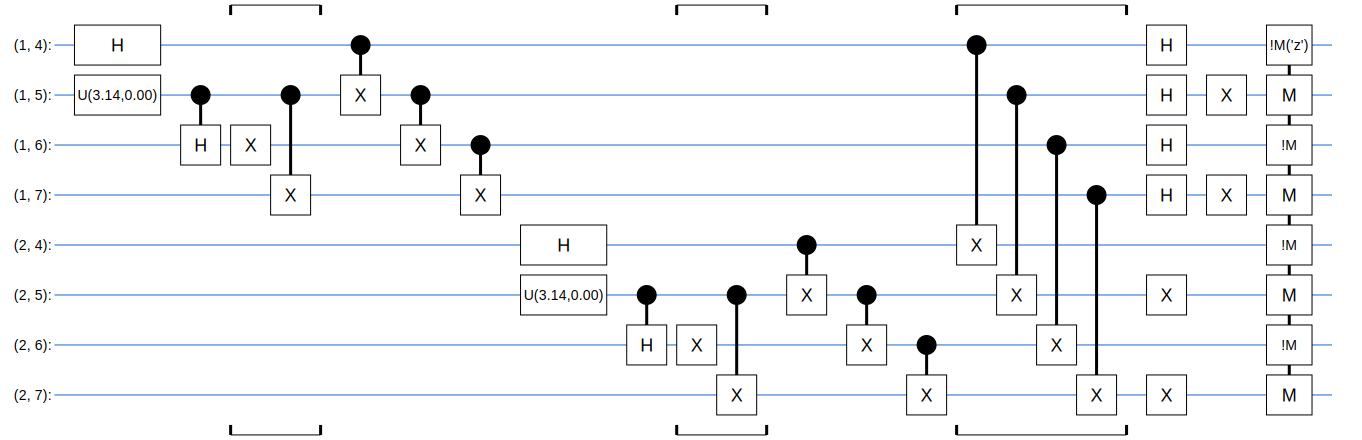

In [390]:
inverted_experiment.svg()

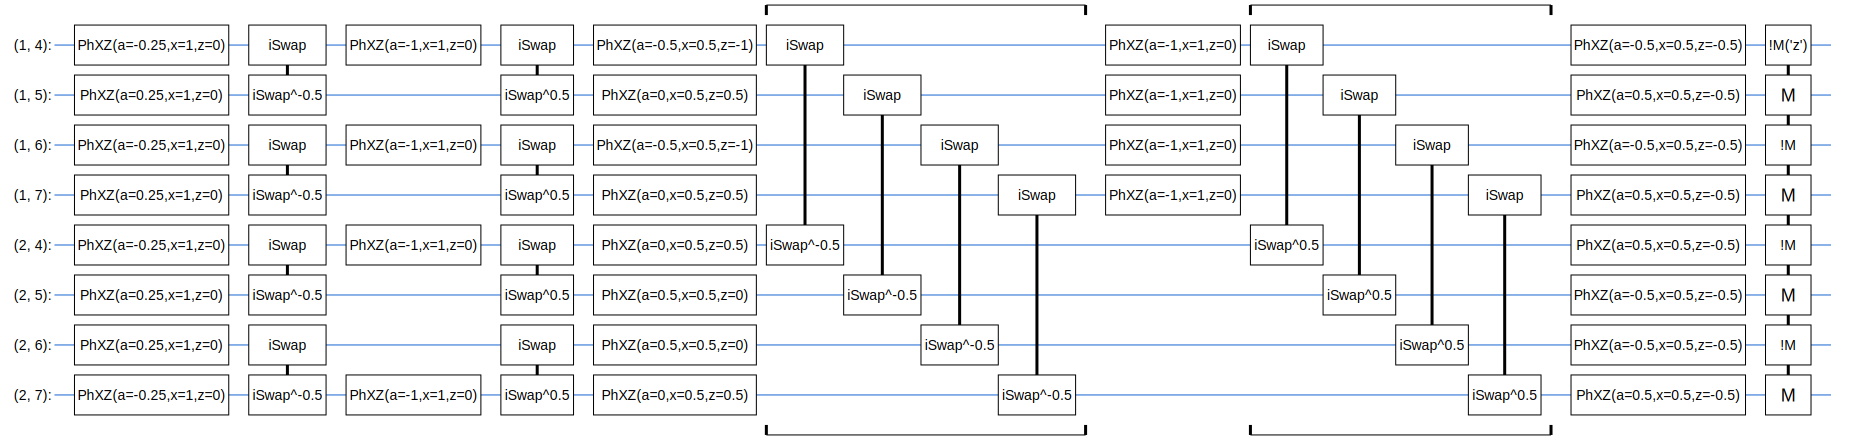

In [391]:
e = ex.Experiment([ex.zero,ex.zero],
                        [qubit(1,4),qubit(1,5),qubit(1,6),qubit(1,7),
                         qubit(2,4),qubit(2,5),qubit(2,7),qubit(2,6)],
                        [(0,4), (1,5), (2,7), (3,6)],
                        invert_mask=[i%2==0 for i in range(8)]
                       )
e.svg()